# Graphene band structure

This example plots the band structure of graphene, a 2D material. 2D band
structures are not supported natively (yet), so we manually build a custom
path in reciprocal space.

n     Energy            log10(ΔE)   log10(Δρ)   Diag   Δtime
---   ---------------   ---------   ---------   ----   ------
  1   -11.15663221095                   -0.60    6.0         
  2   -11.16017978927       -2.45       -1.30    1.0    119ms
  3   -11.16039637236       -3.66       -2.33    1.9    158ms
  4   -11.16041666091       -4.69       -3.28    2.9    162ms
  5   -11.16041704767       -6.41       -3.46    3.1    176ms
  6   -11.16041704978       -8.68       -3.62    1.0    128ms
  7   -11.16041705068       -9.04       -3.89    1.7    128ms
  8   -11.16041705112       -9.36       -4.31    2.0    130ms
  9   -11.16041705133       -9.68       -4.60    2.1    155ms
 10   -11.16041705139      -10.17       -4.90    2.1    140ms
 11   -11.16041705144      -10.35       -5.33    2.9    160ms
 12   -11.16041705145      -11.02       -6.00    3.0    190ms
 13   -11.16041705145      -12.69       -6.31    2.4    141ms


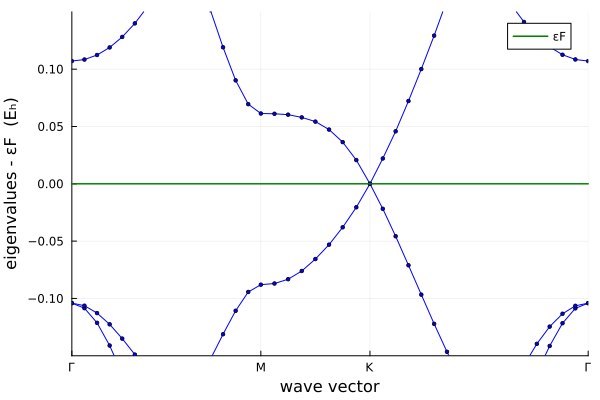

In [1]:
using DFTK
using Unitful
using UnitfulAtomic
using LinearAlgebra
using Plots

# Define the convergence parameters (these should be increased in production)
L = 20  # height of the simulation box
kgrid = [6, 6, 1]
Ecut = 15
temperature = 1e-3

# Define the geometry and pseudopotential
a = 4.66  # lattice constant
a1 = a*[1/2,-sqrt(3)/2, 0]
a2 = a*[1/2, sqrt(3)/2, 0]
a3 = L*[0  , 0        , 1]
lattice = [a1 a2 a3]
C1 = [1/3,-1/3,0.0]  # in reduced coordinates
C2 = -C1
positions = [C1, C2]
C = ElementPsp(:C; psp=load_psp("hgh/pbe/c-q4"))
atoms = [C, C]

# Run SCF
model = model_PBE(lattice, atoms, positions; temperature)
basis = PlaneWaveBasis(model; Ecut, kgrid)
scfres = self_consistent_field(basis)

# Construct 2D path through Brillouin zone
kpath = irrfbz_path(model; dim=2, space_group_number=13)  # graphene space group number
bands = compute_bands(scfres, kpath; kline_density=20)
plot_bandstructure(bands)